In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
customer = pd.read_csv('/content/drive/MyDrive/DATA/DACON/이커머스고객/Customer_info.csv',encoding='utf-8')
online = pd.read_csv('/content/drive/MyDrive/DATA/DACON/이커머스고객/Onlinesales_info.csv',encoding='utf-8')
marketing = pd.read_csv('/content/drive/MyDrive/DATA/DACON/이커머스고객/Marketing_info.csv',encoding='utf-8')
discount = pd.read_csv('/content/drive/MyDrive/DATA/DACON/이커머스고객/Discount_info.csv',encoding='utf-8')
tax = pd.read_csv('/content/drive/MyDrive/DATA/DACON/이커머스고객/Tax_info.csv',encoding='utf-8')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATA/EcommerceData.csv',encoding='utf-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52524 entries, 0 to 52523
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   고객ID     52524 non-null  object 
 1   거래ID     52524 non-null  object 
 2   거래날짜     52524 non-null  object 
 3   제품ID     52524 non-null  object 
 4   제품카테고리   52524 non-null  object 
 5   수량       52524 non-null  int64  
 6   평균금액     52524 non-null  float64
 7   배송료      52524 non-null  float64
 8   쿠폰상태     52524 non-null  object 
 9   구매금액     52524 non-null  float64
 10  초중말      52524 non-null  object 
 11  년        52524 non-null  int64  
 12  월        52524 non-null  object 
 13  요일       52524 non-null  object 
 14  성별       52524 non-null  object 
 15  고객지역     52524 non-null  object 
 16  가입기간     52524 non-null  float64
 17  할인율      52524 non-null  int64  
 18  오프라인비용   52524 non-null  int64  
 19  온라인비용    52524 non-null  float64
 20  GST      52524 non-null  float64
 21  Cluster  525

- 클러스터 0 : 일반고객
- 클러스터 1 : 재구매유도 고객
- 클러스터 2 : 프리미엄 고객
- 클러스터 3 : 이탈위험 고객

In [ ]:
df['가입기간'].unique()

array([1.        , 3.58333333, 2.75      , 4.08333333, 3.83333333,
       1.16666667, 2.08333333, 4.16666667, 3.25      , 1.75      ,
       2.5       , 2.41666667, 2.16666667, 3.41666667, 2.        ,
       3.33333333, 2.33333333, 1.25      , 1.5       , 2.66666667,
       1.91666667, 0.58333333, 0.33333333, 0.66666667, 2.25      ,
       1.08333333, 3.16666667, 1.83333333, 0.5       , 2.83333333,
       3.5       , 3.75      , 0.25      , 1.33333333, 1.41666667,
       1.66666667, 0.75      , 0.83333333, 1.58333333, 0.41666667,
       3.08333333, 2.58333333, 3.66666667, 3.        , 4.        ,
       3.91666667, 0.16666667, 2.91666667, 0.91666667])

In [ ]:
df.groupby('Cluster').size()

Cluster
0     3362
1    16044
2    30371
3     2747
dtype: int64

In [ ]:
general = df[df['Cluster']==0]
general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3362 entries, 379 to 52523
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   고객ID     3362 non-null   object 
 1   거래ID     3362 non-null   object 
 2   거래날짜     3362 non-null   object 
 3   제품ID     3362 non-null   object 
 4   제품카테고리   3362 non-null   object 
 5   수량       3362 non-null   int64  
 6   평균금액     3362 non-null   float64
 7   배송료      3362 non-null   float64
 8   쿠폰상태     3362 non-null   object 
 9   구매금액     3362 non-null   float64
 10  초중말      3362 non-null   object 
 11  년        3362 non-null   int64  
 12  월        3362 non-null   object 
 13  요일       3362 non-null   object 
 14  성별       3362 non-null   object 
 15  고객지역     3362 non-null   object 
 16  가입기간     3362 non-null   float64
 17  할인율      3362 non-null   int64  
 18  오프라인비용   3362 non-null   int64  
 19  온라인비용    3362 non-null   float64
 20  GST      3362 non-null   float64
 21  Cluster  33

In [ ]:
general['가입기간'].unique()

array([4.08333333, 0.33333333, 1.41666667, 1.66666667, 0.75      ,
       2.16666667, 1.58333333, 2.91666667, 1.33333333, 1.5       ,
       3.33333333, 2.66666667, 2.41666667, 3.25      , 1.16666667,
       0.16666667, 4.16666667, 0.91666667, 0.41666667, 3.83333333,
       0.66666667, 3.41666667, 1.91666667, 3.58333333, 2.83333333,
       0.5       , 0.83333333, 1.75      , 2.5       , 3.91666667,
       1.        , 2.        , 1.25      , 1.83333333, 3.        ,
       3.16666667, 0.58333333, 3.08333333, 2.08333333, 3.5       ,
       2.33333333, 2.75      , 4.        , 3.75      , 0.25      ,
       1.08333333, 2.25      , 2.58333333, 3.66666667])

In [ ]:
len(general['고객ID'].unique())

305

In [ ]:
general['Cluster'].unique()

array([0])

In [ ]:
general.head(3)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,구매금액,...,월,요일,성별,고객지역,가입기간,할인율,오프라인비용,온라인비용,GST,Cluster
379,USER_0683,Transaction_0023,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Clicked,153.71,...,Jan,화요일,남,California,4.083333,10,4500,2424.50,0.1,0
380,USER_0683,Transaction_5384,2019-03-26,Product_0983,Nest-USA,1,119.00,6.50,Clicked,119.00,...,Mar,화요일,남,California,4.083333,30,2000,1672.79,0.1,0
381,USER_0683,Transaction_10783,2019-06-19,Product_0981,Nest-USA,5,149.00,12.91,Used,745.00,...,Jun,수요일,남,California,4.083333,30,3500,2617.14,0.1,0


In [ ]:
general.describe()

,수량,평균금액,배송료,구매금액,년,가입기간,할인율,오프라인비용,온라인비용,GST,Cluster
count,3362.000000,3362.000000,3362.000000,3362.000000,3362.0,3362.000000,3362.000000,3362.000000,3362.000000,3362.000000,3362.0
mean,3.884890,56.704881,11.062323,87.095642,19.0,2.220727,22.510410,3099.196907,2088.518638,0.135782,0.0
std,18.215514,73.274250,32.615939,122.074400,0.0,1.163285,7.987124,736.854010,843.962314,0.047712,0.0
min,1.000000,0.400000,0.000000,0.400000,19.0,0.166667,10.000000,500.000000,320.250000,0.050000,0.0
25%,1.000000,4.800000,6.000000,9.990000,19.0,1.333333,20.000000,2500.000000,1362.100000,0.100000,0.0
50%,1.000000,16.990000,6.000000,27.185000,19.0,2.083333,20.000000,3000.000000,1957.580000,0.180000,0.0
75%,2.000000,119.000000,6.500000,121.300000,19.0,3.250000,30.000000,3500.000000,2716.480000,0.180000,0.0
max,600.000000,355.740000,504.000000,1444.150000,19.0,4.166667,30.000000,5000.000000,4556.930000,0.180000,0.0


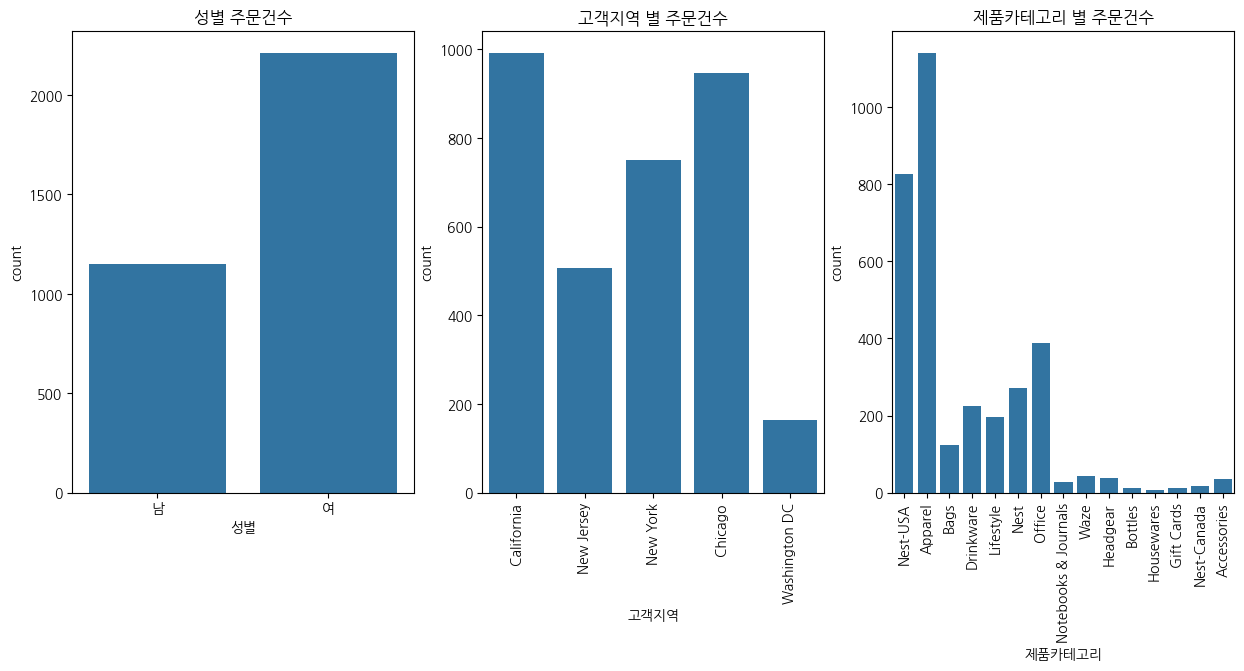

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.countplot(data=general, x='성별')
plt.title('성별 주문건수')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
sns.countplot(data=general, x='고객지역')
plt.title('고객지역 별 주문건수')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sns.countplot(data=general, x='제품카테고리')
plt.title('제품카테고리 별 주문건수')
plt.xticks(rotation=90)


plt.show()

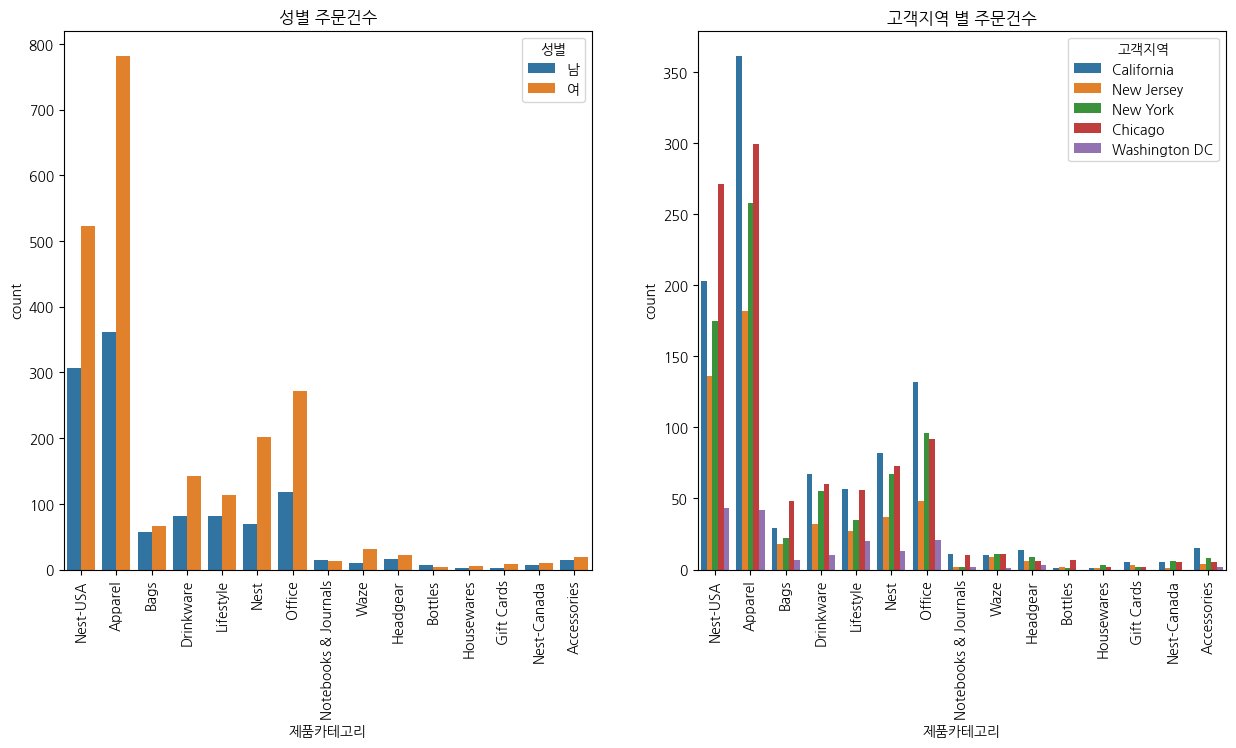

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.countplot(data=general,x='제품카테고리',hue='성별')
plt.title('성별 주문건수')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(data=general, x='제품카테고리',hue='고객지역')
plt.title('고객지역 별 주문건수')
plt.xticks(rotation=90)

plt.show()

In [ ]:
# 제품카테고리 별 평균금액과 배송료
product = general.groupby(['제품카테고리'])[['평균금액','배송료']].mean()
product = product.reset_index()
product

,제품카테고리,평균금액,배송료
0,Accessories,5.167941,17.304412
1,Apparel,16.681611,12.058835
2,Bags,30.858629,10.781935
3,Bottles,3.528182,13.252727
4,Drinkware,10.923036,17.755312
5,Gift Cards,205.562500,0.000000
6,Headgear,14.453684,7.009737
7,Housewares,1.950000,8.552857
8,Lifestyle,3.334103,12.342051
9,Nest,193.233529,7.057941


<ipython-input-17-f089e0c55d75>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product['제품카테고리'], rotation=90)


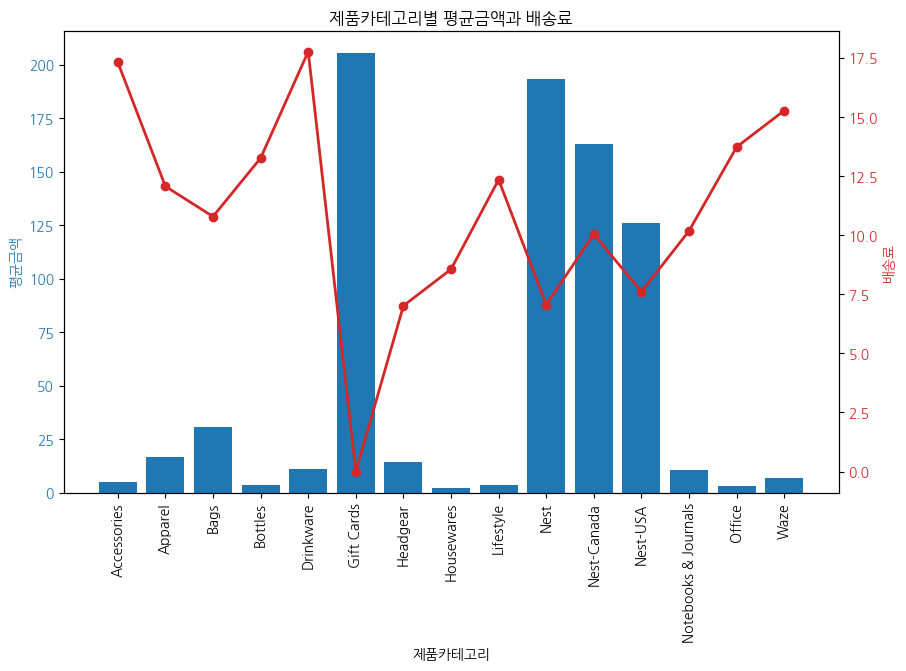

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('제품카테고리')
ax1.set_ylabel('평균금액', color=color)
ax1.bar(product['제품카테고리'], product['평균금액'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(product['제품카테고리'], rotation=90)


ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('배송료', color=color)
ax2.plot(product['제품카테고리'], product['배송료'], color=color, marker='o', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('제품카테고리별 평균금액과 배송료')
plt.show()

In [ ]:
# 지역별 배송료
region = general.groupby(['고객지역'])[['평균금액','배송료']].mean()
region = region.reset_index()
region

,고객지역,평균금액,배송료
0,California,51.688661,7.487442
1,Chicago,60.617128,9.010338
2,New Jersey,59.536299,8.622894
3,New York,56.265787,19.193280
4,Washington DC,57.724207,14.928780


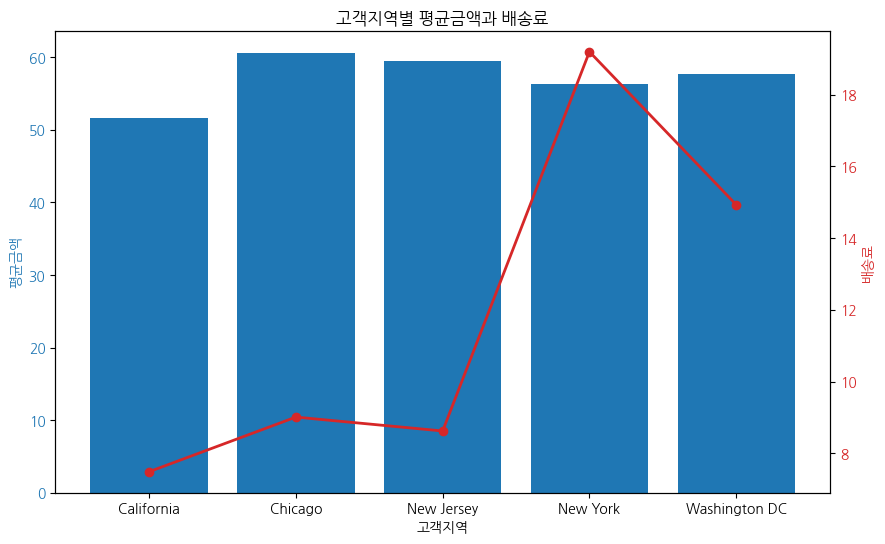

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('고객지역')
ax1.set_ylabel('평균금액', color=color)
ax1.bar(region['고객지역'], region['평균금액'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('배송료', color=color)
ax2.plot(region['고객지역'], region['배송료'], color=color, marker='o', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('고객지역별 평균금액과 배송료')
plt.show()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'California'),
  Text(1, 0, 'New Jersey'),
  Text(2, 0, 'New York'),
  Text(3, 0, 'Chicago'),
  Text(4, 0, 'Washington DC')])

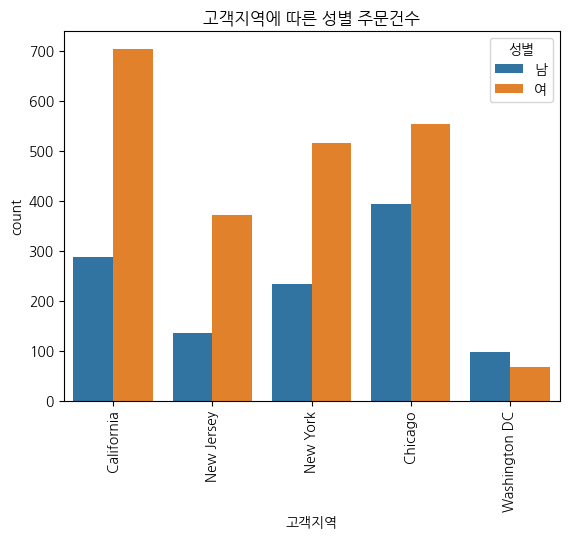

In [ ]:
sns.countplot(data=general, x='고객지역',hue='성별')
plt.title('고객지역에 따른 성별 주문건수')
plt.xticks(rotation=90)

In [ ]:
filtered_customer = customer[customer['고객ID'].isin(general['고객ID'])]
filtered_customer

,고객ID,성별,고객지역,가입기간
4,USER_0683,남,California,49
5,USER_0730,남,California,32
63,USER_1438,여,California,26
78,USER_1120,여,California,19
81,USER_0531,여,California,47
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [ ]:
filtered_online = online[online['고객ID'].isin(general['고객ID'])]
filtered_online

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
65,USER_0683,Transaction_0023,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Clicked
82,USER_0730,Transaction_0035,2019-01-01,Product_0416,Apparel,1,15.67,6.50,Used
83,USER_0730,Transaction_0035,2019-01-01,Product_0638,Apparel,1,61.89,6.50,Clicked
1331,USER_1438,Transaction_0692,2019-01-10,Product_0976,Nest-USA,1,122.77,6.50,Clicked
1332,USER_1438,Transaction_0693,2019-01-10,Product_0981,Nest-USA,1,153.71,6.50,Not Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


<ipython-input-23-3fd073cd5c31>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=filtered_customer, x='가입기간', kde=True, bins=30, palette='Set2', element='step')


Text(0, 0.5, '빈도')

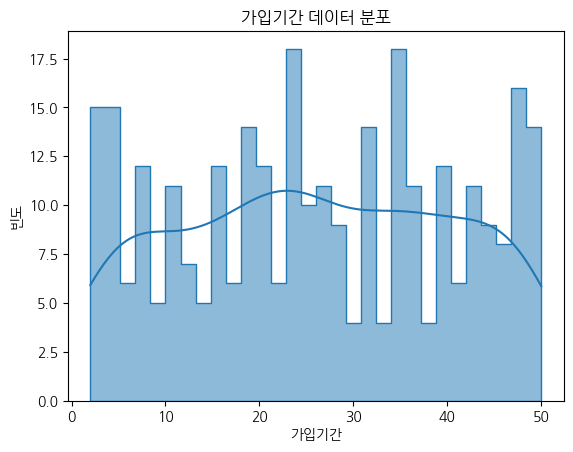

In [ ]:
sns.histplot(data=filtered_customer, x='가입기간', kde=True, bins=30, palette='Set2', element='step')
plt.title('가입기간 데이터 분포')
plt.xlabel('가입기간')
plt.ylabel('빈도')

In [ ]:
month_filter = ((filtered_customer['가입기간'] >= 10) & (filtered_customer['가입기간'] <= 23)) | ((filtered_customer['가입기간'] >= 29) & (filtered_customer['가입기간'] <= 40))
month_filtered_customer = filtered_customer[month_filter]

month_filtered_online = general[general['고객ID'].isin(month_filtered_customer['고객ID'])]
month_filtered_online

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,구매금액,...,월,요일,성별,고객지역,가입기간,할인율,오프라인비용,온라인비용,GST,Cluster
2804,USER_1237,Transaction_1464,2019-01-22,Product_0981,Nest-USA,1,153.71,6.50,Clicked,153.71,...,Jan,화요일,남,New Jersey,1.416667,10,1000,1049.73,0.10,0
2805,USER_1237,Transaction_1465,2019-01-22,Product_0983,Nest-USA,1,122.77,6.50,Clicked,122.77,...,Jan,화요일,남,New Jersey,1.416667,10,1000,1049.73,0.10,0
2806,USER_1237,Transaction_1466,2019-01-22,Product_0976,Nest-USA,1,122.77,6.50,Clicked,122.77,...,Jan,화요일,남,New Jersey,1.416667,10,1000,1049.73,0.10,0
2807,USER_1237,Transaction_1466,2019-01-22,Product_0981,Nest-USA,1,153.71,6.50,Clicked,153.71,...,Jan,화요일,남,New Jersey,1.416667,10,1000,1049.73,0.10,0
2808,USER_1237,Transaction_1467,2019-01-22,Product_0976,Nest-USA,2,122.77,6.50,Clicked,245.54,...,Jan,화요일,남,New Jersey,1.416667,10,1000,1049.73,0.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52480,USER_0305,Transaction_21184,2019-11-17,Product_0181,Drinkware,1,10.39,6.00,Not Used,10.39,...,Nov,일요일,남,New York,2.666667,20,4000,2964.30,0.18,0
52481,USER_0305,Transaction_21184,2019-11-17,Product_0195,Lifestyle,1,3.19,6.00,Clicked,3.19,...,Nov,일요일,남,New York,2.666667,20,4000,2964.30,0.18,0
52491,USER_1408,Transaction_23558,2019-12-13,Product_0896,Drinkware,1,19.56,6.50,Clicked,19.56,...,Dec,금요일,남,Chicago,3.083333,30,4000,3100.42,0.18,0
52498,USER_1105,Transaction_17791,2019-09-28,Product_0181,Drinkware,4,10.39,12.91,Used,41.56,...,Sep,토요일,남,Chicago,1.333333,30,3000,1394.83,0.18,0


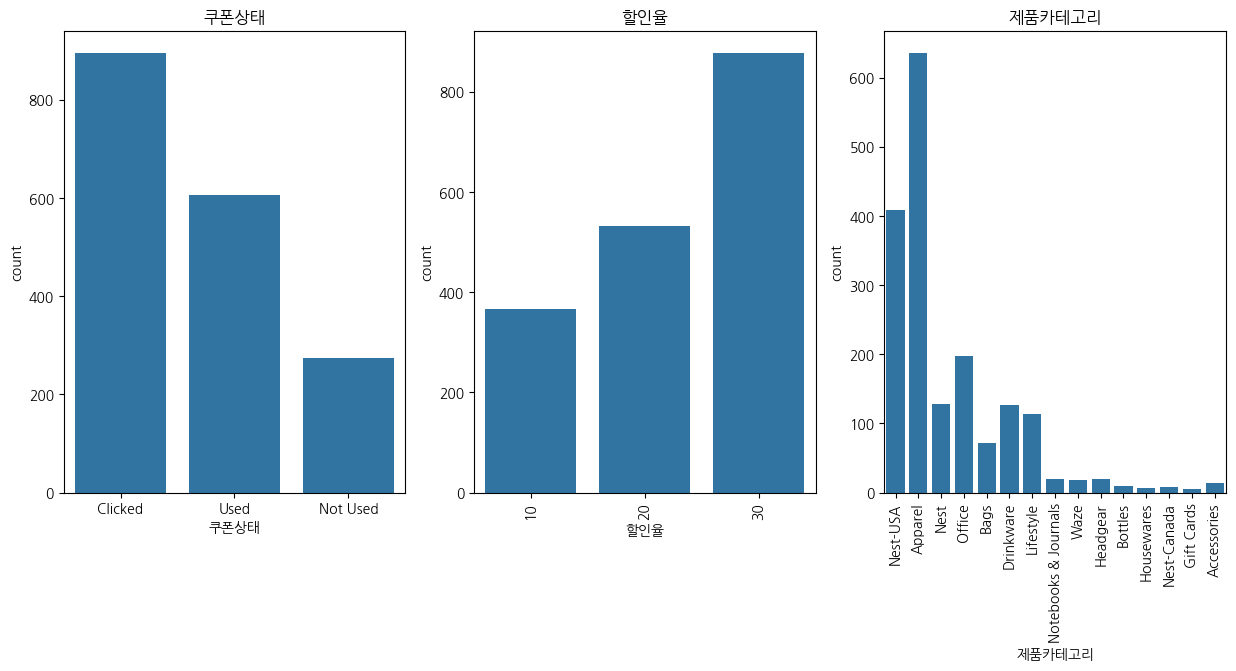

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.countplot(data=month_filtered_online, x='쿠폰상태')
plt.title('쿠폰상태')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
sns.countplot(data=month_filtered_online, x='할인율')
plt.title('할인율')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sns.countplot(data=month_filtered_online, x='제품카테고리')
plt.title('제품카테고리')
plt.xticks(rotation=90)


plt.show()

Text(0, 0.5, '빈도')

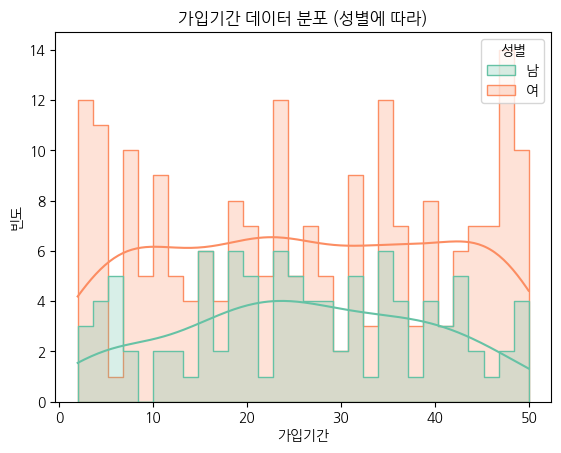

In [ ]:
sns.histplot(data=filtered_customer, x='가입기간', hue='성별', kde=True, bins=30, palette='Set2', element='step')
plt.title('가입기간 데이터 분포 (성별에 따라)')
plt.xlabel('가입기간')
plt.ylabel('빈도')

<ipython-input-27-c575456c6657>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=general, x='가입기간', kde=True, bins=30, palette='Set2', element='step')


Text(0, 0.5, '빈도')

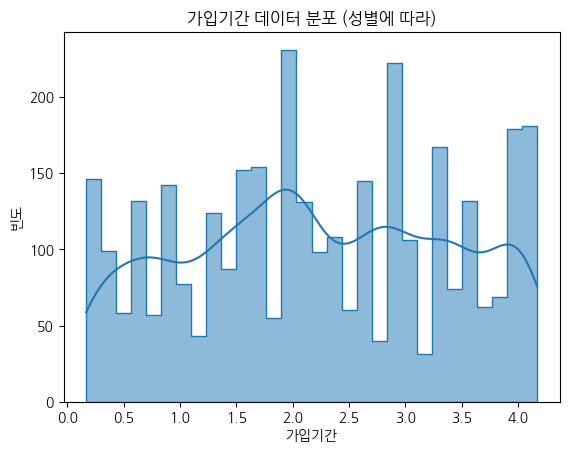

In [ ]:
sns.histplot(data=general, x='가입기간', kde=True, bins=30, palette='Set2', element='step')
plt.title('가입기간 데이터 분포 (성별에 따라)')
plt.xlabel('가입기간')
plt.ylabel('빈도')

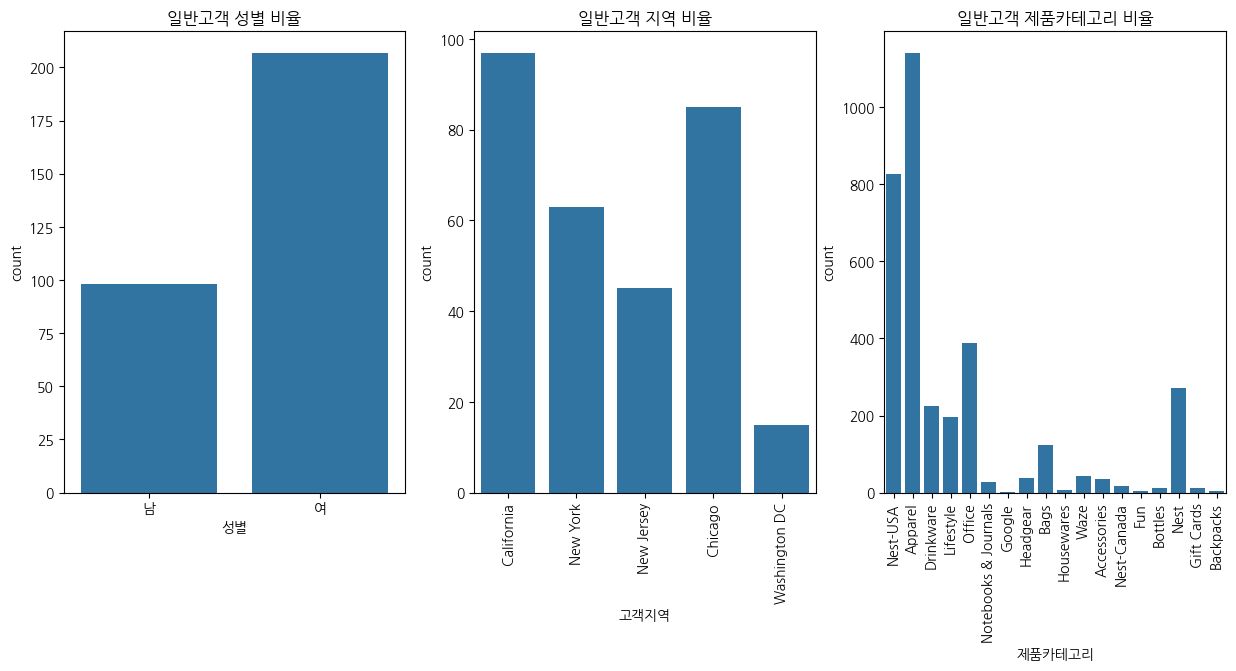

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.countplot(data=filtered_customer, x='성별')
plt.title('일반고객 성별 비율')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
sns.countplot(data=filtered_customer, x='고객지역')
plt.title('일반고객 지역 비율')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sns.countplot(data=filtered_online, x='제품카테고리')
plt.title('일반고객 제품카테고리 비율')
plt.xticks(rotation=90)


plt.show()

In [ ]:
general['쿠폰상태'].unique()

array(['Clicked', 'Used', 'Not Used'], dtype=object)

In [ ]:
general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3362 entries, 379 to 52523
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   고객ID     3362 non-null   object 
 1   거래ID     3362 non-null   object 
 2   거래날짜     3362 non-null   object 
 3   제품ID     3362 non-null   object 
 4   제품카테고리   3362 non-null   object 
 5   수량       3362 non-null   int64  
 6   평균금액     3362 non-null   float64
 7   배송료      3362 non-null   float64
 8   쿠폰상태     3362 non-null   object 
 9   구매금액     3362 non-null   float64
 10  초중말      3362 non-null   object 
 11  년        3362 non-null   int64  
 12  월        3362 non-null   object 
 13  요일       3362 non-null   object 
 14  성별       3362 non-null   object 
 15  고객지역     3362 non-null   object 
 16  가입기간     3362 non-null   float64
 17  할인율      3362 non-null   int64  
 18  오프라인비용   3362 non-null   int64  
 19  온라인비용    3362 non-null   float64
 20  GST      3362 non-null   float64
 21  Cluster  33

In [ ]:
sales_counts = general.groupby(['제품카테고리','월']).size()
max_sales = sales_counts.groupby(level=0).idxmax()
max_sales_counts = sales_counts.loc[max_sales].reset_index(name='판매량')
max_sales_counts

,제품카테고리,월,판매량
0,Accessories,Dec,13
1,Apparel,Dec,278
2,Bags,Sep,33
3,Bottles,Sep,5
4,Drinkware,Sep,63
5,Gift Cards,Oct,8
6,Headgear,Sep,12
7,Housewares,Aug,2
8,Lifestyle,Sep,72
9,Nest,Dec,119


In [ ]:
general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3362 entries, 379 to 52523
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   고객ID     3362 non-null   object 
 1   거래ID     3362 non-null   object 
 2   거래날짜     3362 non-null   object 
 3   제품ID     3362 non-null   object 
 4   제품카테고리   3362 non-null   object 
 5   수량       3362 non-null   int64  
 6   평균금액     3362 non-null   float64
 7   배송료      3362 non-null   float64
 8   쿠폰상태     3362 non-null   object 
 9   구매금액     3362 non-null   float64
 10  초중말      3362 non-null   object 
 11  년        3362 non-null   int64  
 12  월        3362 non-null   object 
 13  요일       3362 non-null   object 
 14  성별       3362 non-null   object 
 15  고객지역     3362 non-null   object 
 16  가입기간     3362 non-null   float64
 17  할인율      3362 non-null   int64  
 18  오프라인비용   3362 non-null   int64  
 19  온라인비용    3362 non-null   float64
 20  GST      3362 non-null   float64
 21  Cluster  33

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '화요일'),
  Text(1, 0, '수요일'),
  Text(2, 0, '금요일'),
  Text(3, 0, '토요일'),
  Text(4, 0, '월요일'),
  Text(5, 0, '일요일'),
  Text(6, 0, '목요일')])

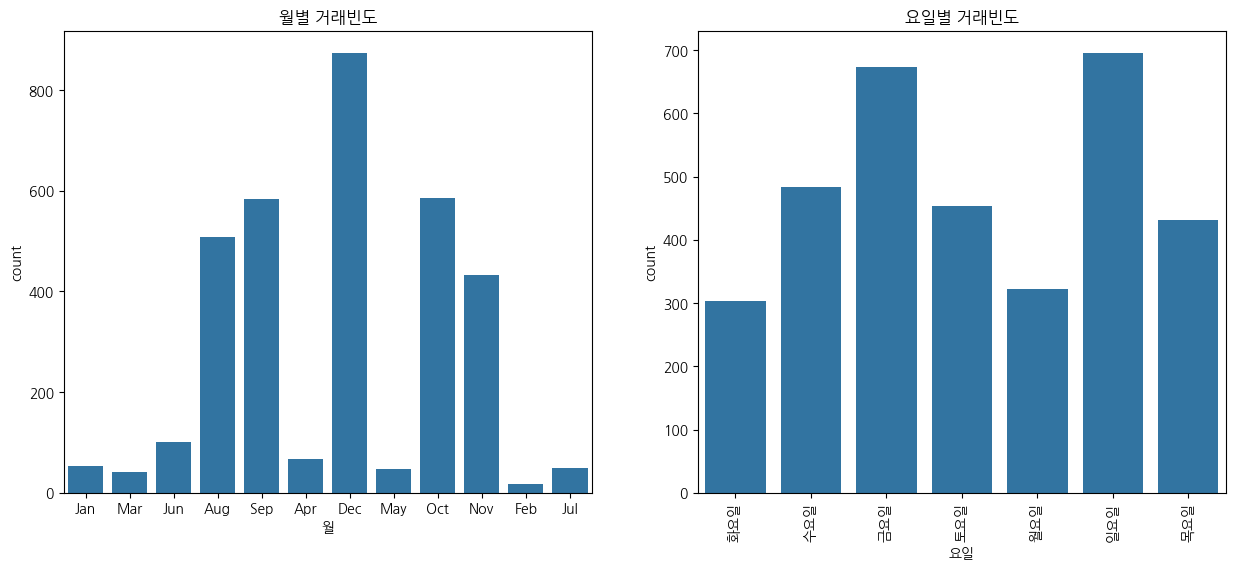

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=general, x='월')
plt.title('월별 거래빈도')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
sns.countplot(data=general, x='요일')
plt.title('요일별 거래빈도')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '화요일'),
  Text(1, 0, '수요일'),
  Text(2, 0, '금요일'),
  Text(3, 0, '토요일'),
  Text(4, 0, '월요일'),
  Text(5, 0, '일요일'),
  Text(6, 0, '목요일')])

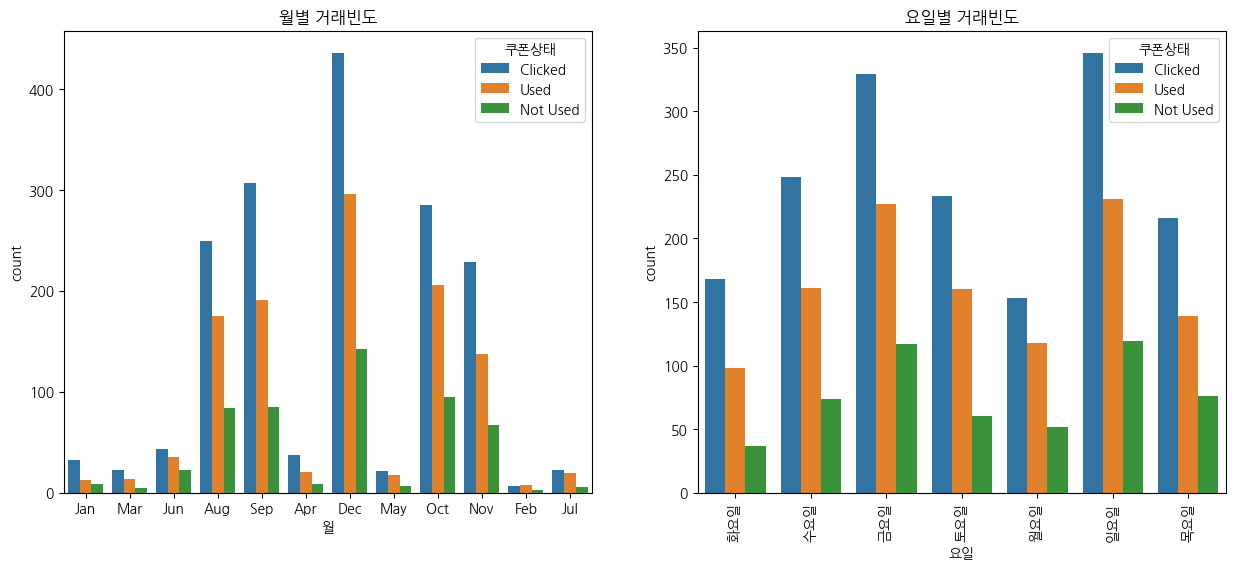

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=general, x='월', hue='쿠폰상태')
plt.title('월별 거래빈도')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
sns.countplot(data=general, x='요일',hue='쿠폰상태')
plt.title('요일별 거래빈도')
plt.xticks(rotation=90)

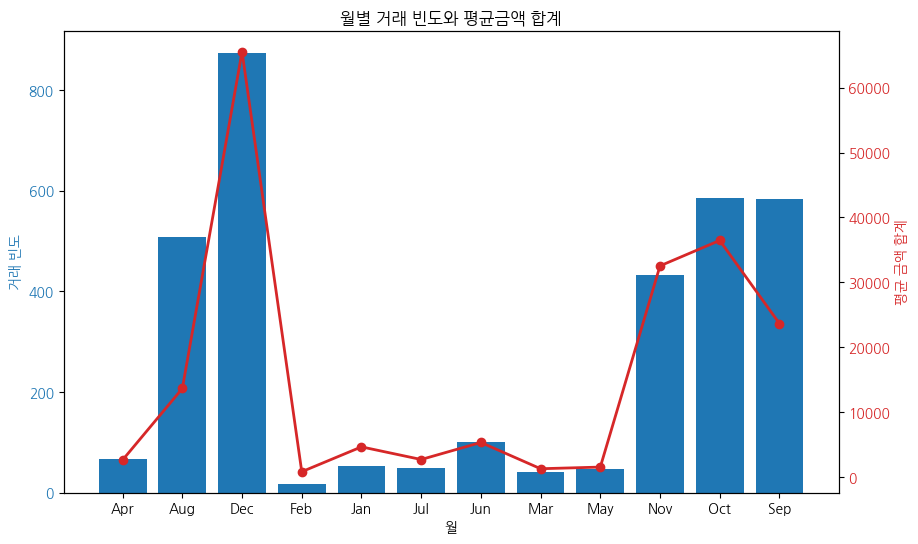

In [ ]:
monthly_data = general.groupby('월').agg(Count=('월', 'size'), Total_Average_Amount=('평균금액', 'sum'))

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('월')
ax1.set_ylabel('거래 빈도', color=color)
ax1.bar(monthly_data.index, monthly_data['Count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('평균 금액 합계', color=color)
ax2.plot(monthly_data.index, monthly_data['Total_Average_Amount'], color=color, marker='o', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('월별 거래 빈도와 평균금액 합계')

plt.show()

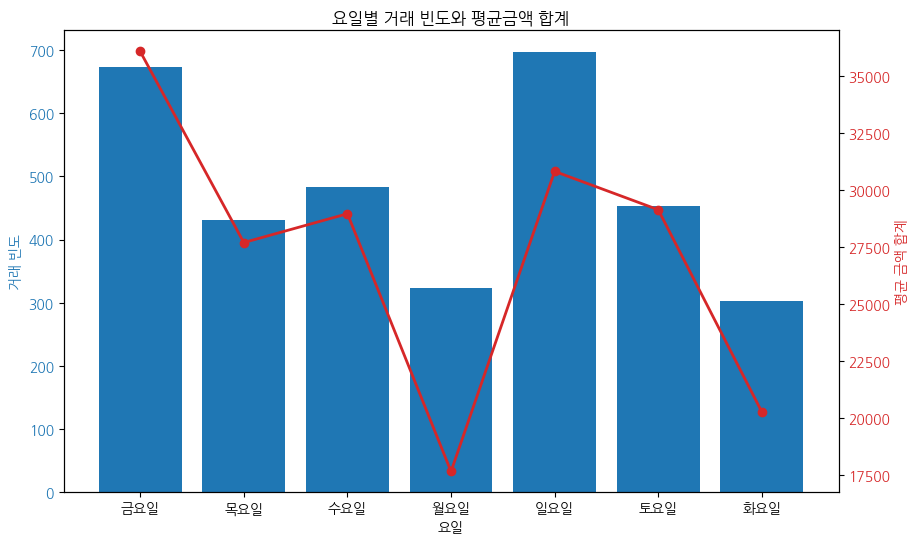

In [ ]:
day_data = general.groupby('요일').agg(Count=('요일', 'size'), Total_Average_Amount=('평균금액', 'sum'))

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('요일')
ax1.set_ylabel('거래 빈도', color=color)
ax1.bar(day_data.index, day_data['Count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('평균 금액 합계', color=color)
ax2.plot(day_data.index, day_data['Total_Average_Amount'], color=color, marker='o', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('요일별 거래 빈도와 평균금액 합계')

plt.show()

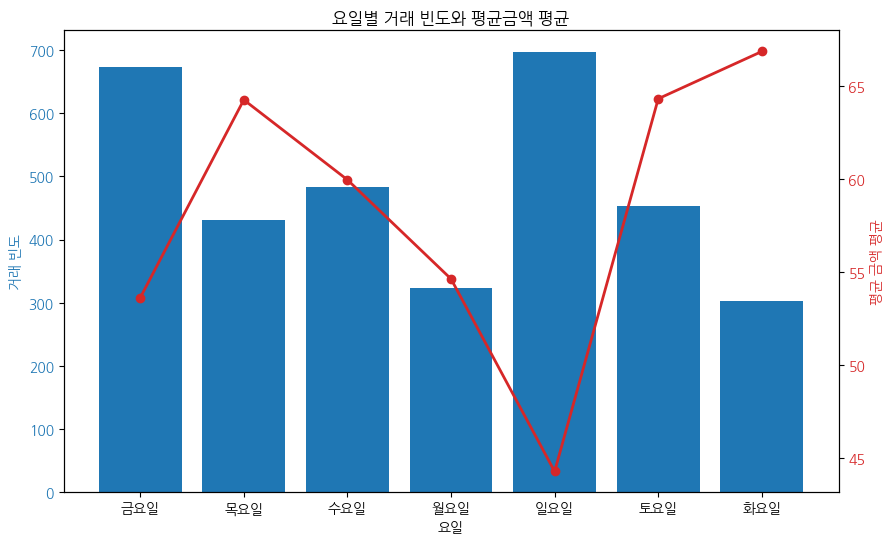

In [ ]:
day_data = general.groupby('요일').agg(Count=('요일', 'size'), Total_Average_Amount=('평균금액', 'mean'))

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('요일')
ax1.set_ylabel('거래 빈도', color=color)
ax1.bar(day_data.index, day_data['Count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('평균 금액 평균', color=color)
ax2.plot(day_data.index, day_data['Total_Average_Amount'], color=color, marker='o', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('요일별 거래 빈도와 평균금액 평균')

plt.show()

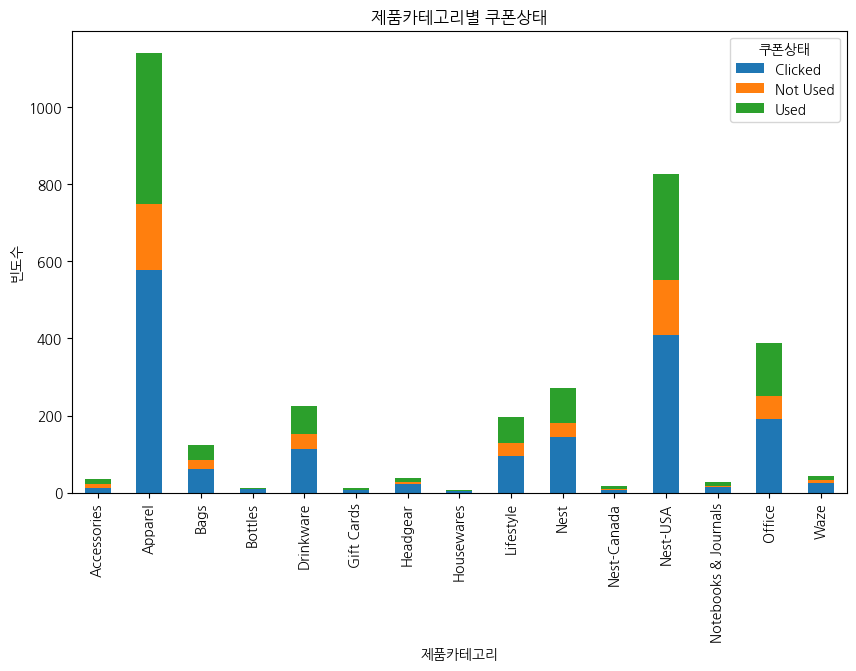

In [ ]:
category_coupon_status = general.groupby(['제품카테고리', '쿠폰상태']).size()
category_coupon_status_unstacked = category_coupon_status.unstack(fill_value=0)
category_coupon_status_unstacked.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('제품카테고리별 쿠폰상태')
plt.xlabel('제품카테고리')
plt.ylabel('빈도수')

plt.legend(title='쿠폰상태')

plt.show()

In [ ]:
general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3362 entries, 379 to 52523
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   고객ID     3362 non-null   object 
 1   거래ID     3362 non-null   object 
 2   거래날짜     3362 non-null   object 
 3   제품ID     3362 non-null   object 
 4   제품카테고리   3362 non-null   object 
 5   수량       3362 non-null   int64  
 6   평균금액     3362 non-null   float64
 7   배송료      3362 non-null   float64
 8   쿠폰상태     3362 non-null   object 
 9   구매금액     3362 non-null   float64
 10  초중말      3362 non-null   object 
 11  년        3362 non-null   int64  
 12  월        3362 non-null   object 
 13  요일       3362 non-null   object 
 14  성별       3362 non-null   object 
 15  고객지역     3362 non-null   object 
 16  가입기간     3362 non-null   float64
 17  할인율      3362 non-null   int64  
 18  오프라인비용   3362 non-null   int64  
 19  온라인비용    3362 non-null   float64
 20  GST      3362 non-null   float64
 21  Cluster  33

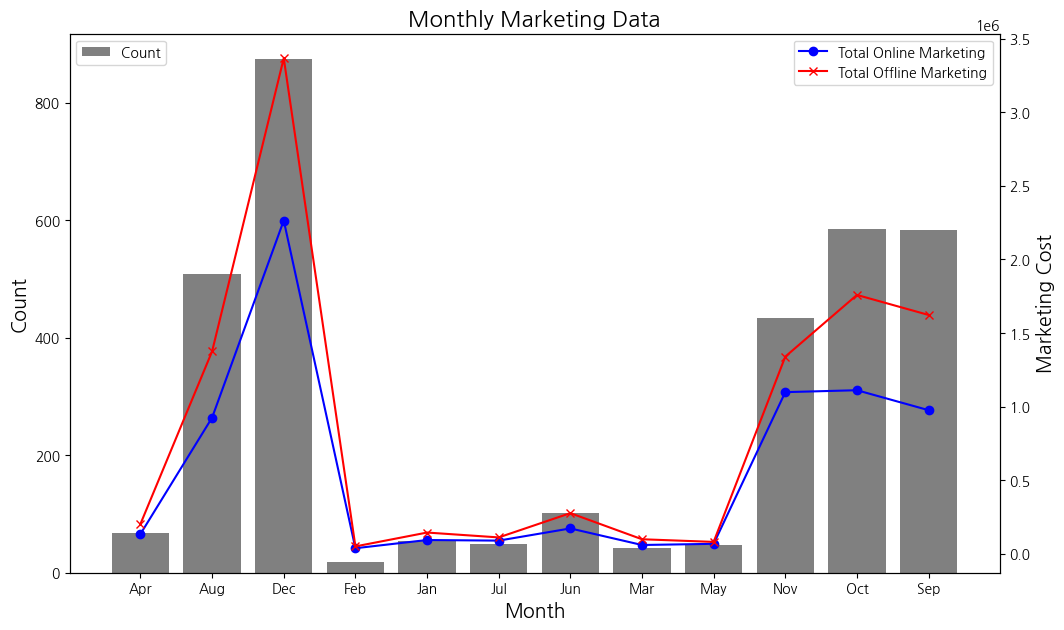

In [ ]:
month_marketing_data = general.groupby('월').agg(Count=('월', 'size'),
                                           Total_online_marketing=('온라인비용', 'sum'),
                                           Total_offline_marketing=('오프라인비용','sum'))

plt.figure(figsize=(12, 7))

plt.bar(month_marketing_data.index, month_marketing_data['Count'], color='grey', label='Count')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(month_marketing_data.index, month_marketing_data['Total_online_marketing'], color='blue', marker='o', label='Total Online Marketing')
ax2.plot(month_marketing_data.index, month_marketing_data['Total_offline_marketing'], color='red', marker='x', label='Total Offline Marketing')

ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax2.set_ylabel('Marketing Cost', fontsize=14)
plt.title('Monthly Marketing Data', fontsize=16)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
marketing_data = general.groupby('요일').agg(Count=('요일', 'size'),
                                           Total_online_marketing=('온라인비용', 'sum'),
                                           Total_offline_marketing=('오프라인비용','sum'))
marketing_data

,Count,Total_online_marketing,Total_offline_marketing
요일,,,
금요일,673,1468198.19,2057000
목요일,431,748970.04,1290100
수요일,483,788433.10,1434000
월요일,323,618784.10,1040400
일요일,696,1692021.14,2181500
토요일,453,1042431.87,1456500
화요일,303,662761.22,960000


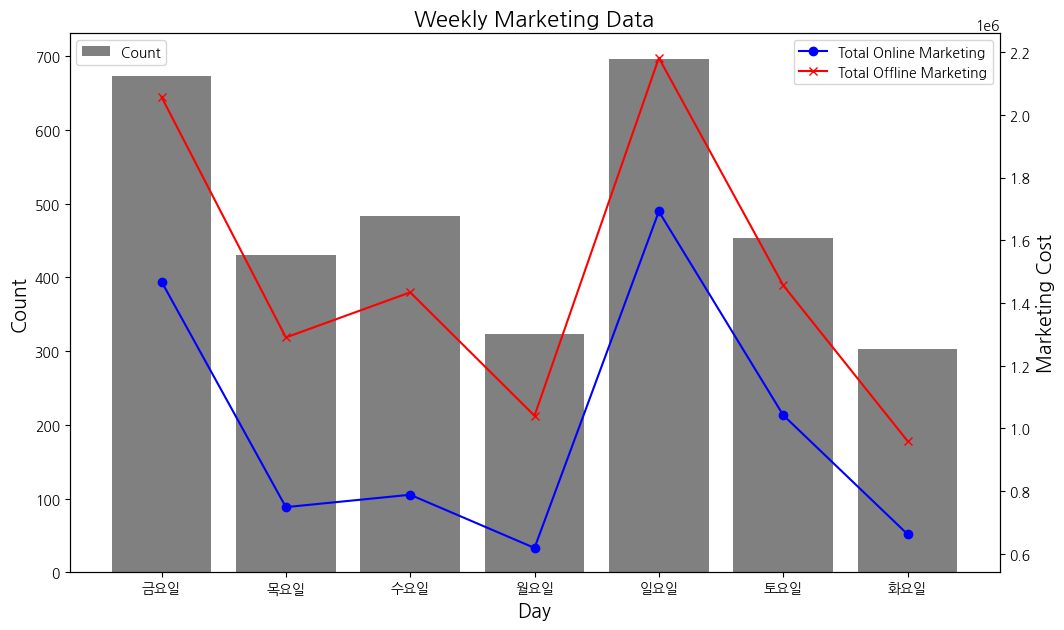

In [ ]:
plt.figure(figsize=(12, 7))

plt.bar(marketing_data.index, marketing_data['Count'], color='grey', label='Count')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(marketing_data.index, marketing_data['Total_online_marketing'], color='blue', marker='o', label='Total Online Marketing')
ax2.plot(marketing_data.index, marketing_data['Total_offline_marketing'], color='red', marker='x', label='Total Offline Marketing')

ax.set_xlabel('Day', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax2.set_ylabel('Marketing Cost', fontsize=14)
plt.title('Weekly Marketing Data', fontsize=16)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

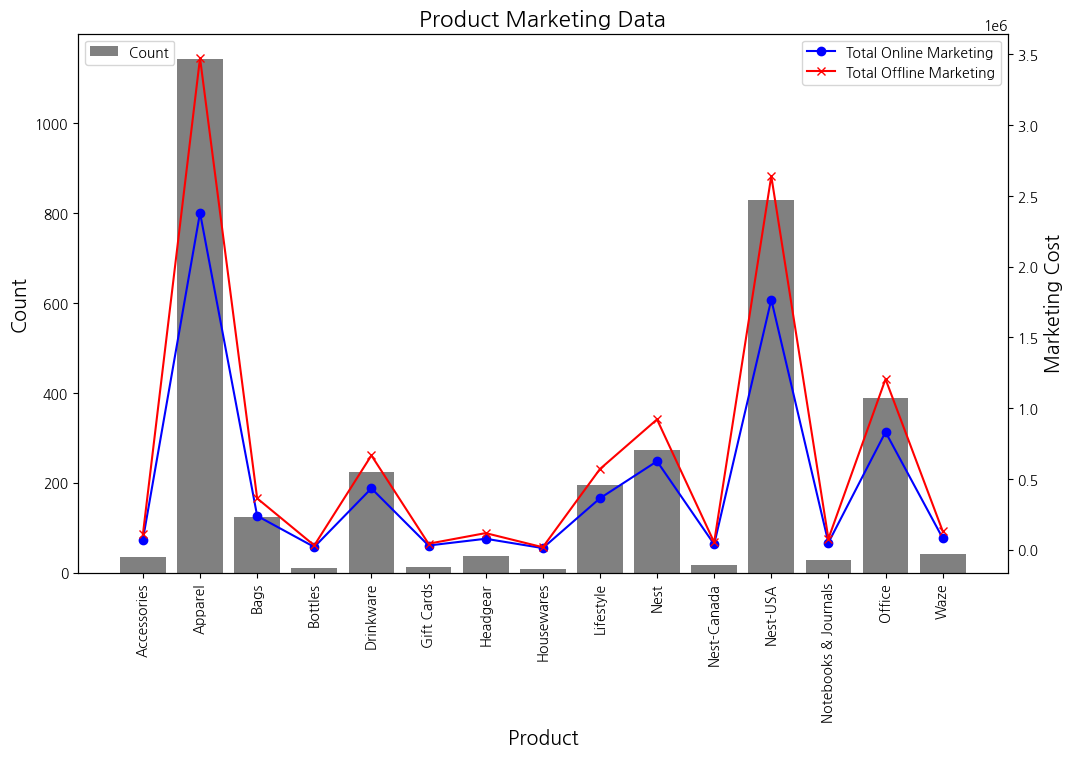

In [ ]:
product_marketing_data = general.groupby('제품카테고리').agg(Count=('제품카테고리', 'size'),
                                           Total_online_marketing=('온라인비용', 'sum'),
                                           Total_offline_marketing=('오프라인비용','sum'))

plt.figure(figsize=(12, 7))

plt.bar(product_marketing_data.index, product_marketing_data['Count'], color='grey', label='Count')

plt.xticks(rotation=90)
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(product_marketing_data.index, product_marketing_data['Total_online_marketing'], color='blue', marker='o', label='Total Online Marketing')
ax2.plot(product_marketing_data.index, product_marketing_data['Total_offline_marketing'], color='red', marker='x', label='Total Offline Marketing')

ax.set_xlabel('Product', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax2.set_ylabel('Marketing Cost', fontsize=14)
plt.title('Product Marketing Data', fontsize=16)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

---

In [ ]:
danger = df[df['Cluster']==3]
danger

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,구매금액,...,요일,성별,고객지역,가입기간,할인율,오프라인비용,온라인비용,GST,Cluster,Recency
699,USER_1277,Transaction_0130,2019-01-03,Product_0983,Nest-USA,1,122.77,6.5,Clicked,122.77,...,목요일,남,Chicago,4.166667,10,4500,1576.38,0.10,3,363
700,USER_1277,Transaction_0131,2019-01-03,Product_0981,Nest-USA,2,153.71,6.5,Used,307.42,...,목요일,남,Chicago,4.166667,10,4500,1576.38,0.10,3,363
701,USER_1277,Transaction_0132,2019-01-03,Product_0976,Nest-USA,1,122.77,6.5,Not Used,122.77,...,목요일,남,Chicago,4.166667,10,4500,1576.38,0.10,3,363
702,USER_1277,Transaction_0133,2019-01-03,Product_0904,Office,1,2.05,6.5,Clicked,2.05,...,목요일,남,Chicago,4.166667,10,4500,1576.38,0.10,3,363
703,USER_1277,Transaction_0133,2019-01-03,Product_0970,Office,1,2.05,6.5,Clicked,2.05,...,목요일,남,Chicago,4.166667,10,4500,1576.38,0.10,3,363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52513,USER_1220,Transaction_6798,2019-04-18,Product_0918,Lifestyle,2,2.80,6.0,Clicked,5.60,...,목요일,여,California,1.750000,10,4000,1476.58,0.18,3,258
52514,USER_0564,Transaction_8321,2019-05-11,Product_1017,Waze,1,5.59,6.0,Clicked,5.59,...,토요일,여,California,4.000000,20,3000,1801.66,0.18,3,235
52515,USER_0633,Transaction_6078,2019-04-07,Product_0925,Headgear,1,15.19,6.5,Not Used,15.19,...,일요일,여,Chicago,3.583333,10,2500,2719.46,0.05,3,269
52516,USER_0186,Transaction_12210,2019-07-12,Product_0186,Headgear,1,9.99,6.0,Clicked,9.99,...,금요일,여,New York,2.916667,10,2500,923.40,0.05,3,173


In [ ]:
danger.groupby('성별').size()

성별
남    1015
여    1732
dtype: int64

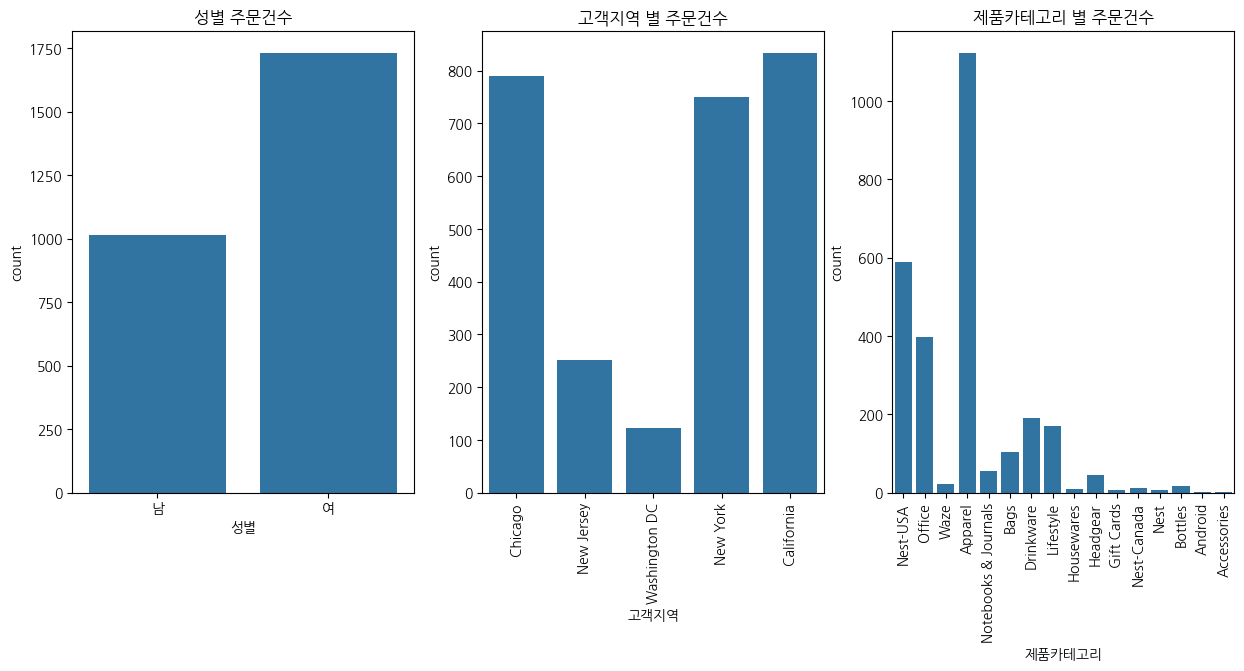

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.countplot(data=danger, x='성별')
plt.title('성별 주문건수')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
sns.countplot(data=danger, x='고객지역')
plt.title('고객지역 별 주문건수')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sns.countplot(data=danger, x='제품카테고리')
plt.title('제품카테고리 별 주문건수')
plt.xticks(rotation=90)


plt.show()

In [ ]:
df.head(3)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,구매금액,...,월,요일,성별,고객지역,가입기간,할인율,오프라인비용,온라인비용,GST,Cluster
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,...,Jan,화요일,남,Chicago,1.0,10,4500,2424.5,0.1,1
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,...,Jan,화요일,남,Chicago,1.0,10,4500,2424.5,0.1,1
2,USER_1358,Transaction_0013,2019-01-01,Product_0983,Nest-USA,2,122.77,6.5,Not Used,245.54,...,Jan,화요일,남,Chicago,1.0,10,4500,2424.5,0.1,1


In [ ]:
df['거래날짜'] = pd.to_datetime(df['거래날짜'])
df['Recency'] = (pd.Timestamp('2020-01-01') - df['거래날짜']).dt.days
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52524 entries, 0 to 52523
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   고객ID     52524 non-null  object        
 1   거래ID     52524 non-null  object        
 2   거래날짜     52524 non-null  datetime64[ns]
 3   제품ID     52524 non-null  object        
 4   제품카테고리   52524 non-null  object        
 5   수량       52524 non-null  int64         
 6   평균금액     52524 non-null  float64       
 7   배송료      52524 non-null  float64       
 8   쿠폰상태     52524 non-null  object        
 9   구매금액     52524 non-null  float64       
 10  초중말      52524 non-null  object        
 11  년        52524 non-null  int64         
 12  월        52524 non-null  object        
 13  요일       52524 non-null  object        
 14  성별       52524 non-null  object        
 15  고객지역     52524 non-null  object        
 16  가입기간     52524 non-null  float64       
 17  할인율      52524 non-null  int64 

In [ ]:
recency_per_customer = danger.groupby('고객ID')['Recency'].min()
recency_per_customer_df = recency_per_customer.reset_index()
recency_per_customer_df.columns = ['고객ID', 'Recency']
recency_per_customer_df

,고객ID,Recency
0,USER_0010,157
1,USER_0022,173
2,USER_0027,223
3,USER_0040,167
4,USER_0042,151
...,...,...
347,USER_1454,257
348,USER_1457,203
349,USER_1462,180
350,USER_1463,271


In [ ]:
danger_filtered_customer = customer[customer['고객ID'].isin(danger['고객ID'])]
danger_filtered_customer

,고객ID,성별,고객지역,가입기간
3,USER_0345,여,California,30
7,USER_1347,여,New Jersey,24
10,USER_0922,남,Chicago,49
12,USER_1249,여,New York,19
17,USER_1277,남,Chicago,50
...,...,...,...,...
1070,USER_0909,여,New York,26
1076,USER_0838,여,Chicago,44
1078,USER_0798,남,California,32
1079,USER_0110,여,California,5


In [ ]:
merged_df = pd.merge(danger_filtered_customer, recency_per_customer_df, on='고객ID', how='inner')
merged_df

,고객ID,성별,고객지역,가입기간,Recency
0,USER_0345,여,California,30,365
1,USER_1347,여,New Jersey,24,331
2,USER_0922,남,Chicago,49,364
3,USER_1249,여,New York,19,364
4,USER_1277,남,Chicago,50,363
...,...,...,...,...,...
347,USER_0909,여,New York,26,136
348,USER_0838,여,Chicago,44,135
349,USER_0798,남,California,32,135
350,USER_0110,여,California,5,135


In [ ]:
merged_df.min()

고객ID        USER_0010
성별                  남
고객지역       California
가입기간                2
Recency           133
dtype: object

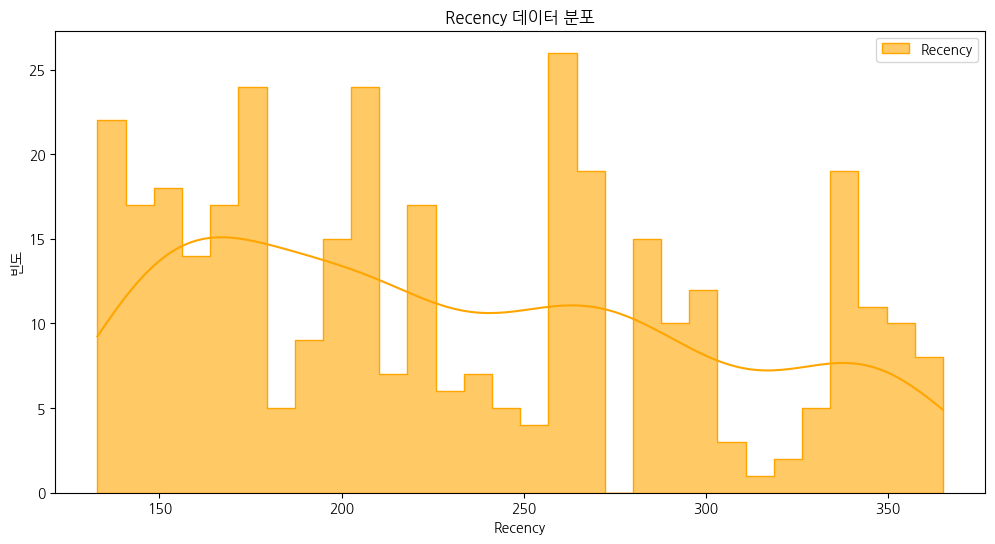

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_df, x='Recency', kde=True, bins=30, color='orange', label='Recency', element='step', alpha=0.6)

plt.title('Recency 데이터 분포')
plt.xlabel('Recency')
plt.ylabel('빈도')
plt.legend()
plt.show()

<ipython-input-74-86319d75ba05>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=danger, x='월', kde=True, bins=30, palette='Set2', element='step')


Text(0, 0.5, '빈도')

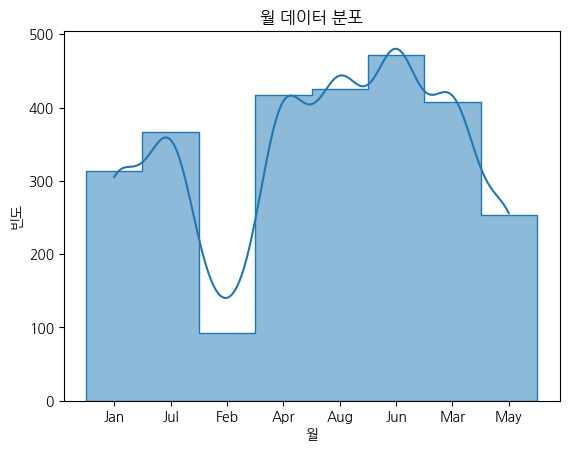

In [ ]:
sns.histplot(data=danger, x='월', kde=True, bins=30, palette='Set2', element='step')
plt.title('월 데이터 분포')
plt.xlabel('월')
plt.ylabel('빈도')

<ipython-input-75-cc80a6df48bc>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=danger, x='요일', kde=True, bins=30, palette='Set2', element='step')


Text(0, 0.5, '빈도')

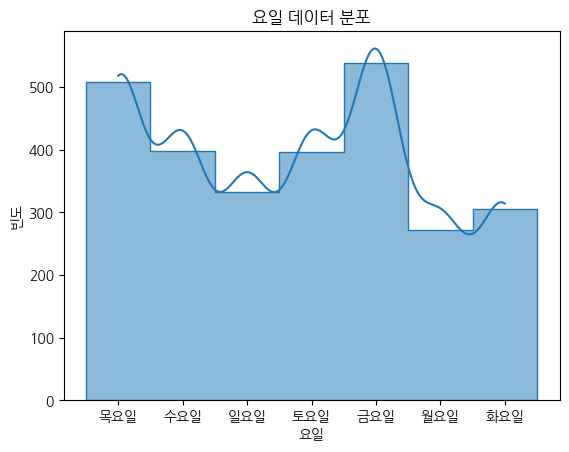

In [ ]:
sns.histplot(data=danger, x='요일', kde=True, bins=30, palette='Set2', element='step')
plt.title('요일 데이터 분포')
plt.xlabel('요일')
plt.ylabel('빈도')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Nest-USA'),
  Text(1, 0, 'Office'),
  Text(2, 0, 'Waze'),
  Text(3, 0, 'Apparel'),
  Text(4, 0, 'Notebooks & Journals'),
  Text(5, 0, 'Bags'),
  Text(6, 0, 'Drinkware'),
  Text(7, 0, 'Lifestyle'),
  Text(8, 0, 'Housewares'),
  Text(9, 0, 'Headgear'),
  Text(10, 0, 'Gift Cards'),
  Text(11, 0, 'Nest-Canada'),
  Text(12, 0, 'Nest'),
  Text(13, 0, 'Bottles'),
  Text(14, 0, 'Android'),
  Text(15, 0, 'Accessories')])

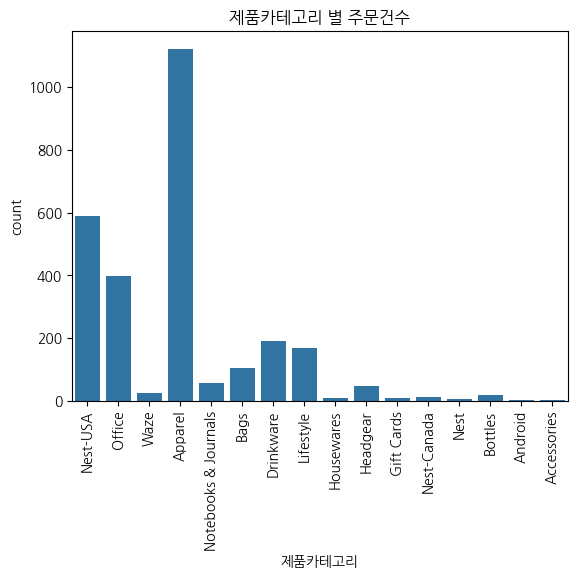

In [ ]:
sns.countplot(data=danger, x='제품카테고리')
plt.title('제품카테고리 별 주문건수')
plt.xticks(rotation=90)

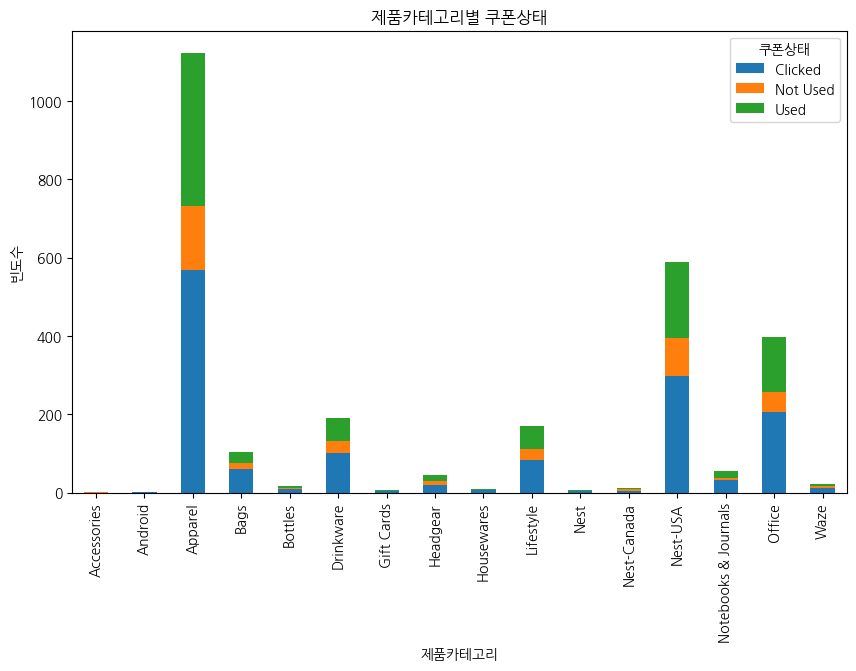

In [ ]:
category_coupon_status = danger.groupby(['제품카테고리', '쿠폰상태']).size()
category_coupon_status_unstacked = category_coupon_status.unstack(fill_value=0)
category_coupon_status_unstacked.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('제품카테고리별 쿠폰상태')
plt.xlabel('제품카테고리')
plt.ylabel('빈도수')

plt.legend(title='쿠폰상태')

plt.show()

<ipython-input-79-51e23ef05c56>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_mean, x='제품카테고리',y='평균금액',palette='Set2')


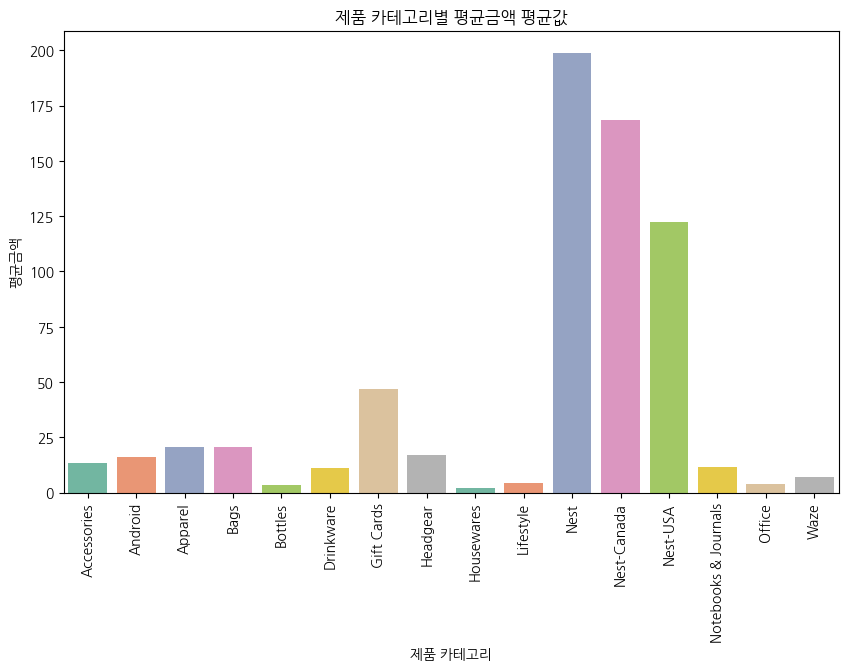

In [ ]:
product_mean = danger.groupby(['제품카테고리'])['평균금액'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=product_mean, x='제품카테고리',y='평균금액',palette='Set2')

plt.title('제품 카테고리별 평균금액 평균값')
plt.xlabel('제품 카테고리')
plt.ylabel('평균금액')

plt.xticks(rotation=90)
plt.show()